In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip install sklearn

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import torch as t
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import tsne
t.manual_seed(304)

/home/zk/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
t.cuda.set_device(2)
X=t.load('./x.pt')#0,1二值化的
X = X.cpu()
X=t.from_numpy(PCA(n_components=30).fit_transform(X.numpy())).float()
C=t.load('./labels.pt').float()
C = C.cpu()
# X=X[0:600]
# C=C[0:600]
print(C.shape)
print(C.dtype)

torch.Size([3221, 1])
torch.float32


In [5]:
C.unique()

tensor([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18.])

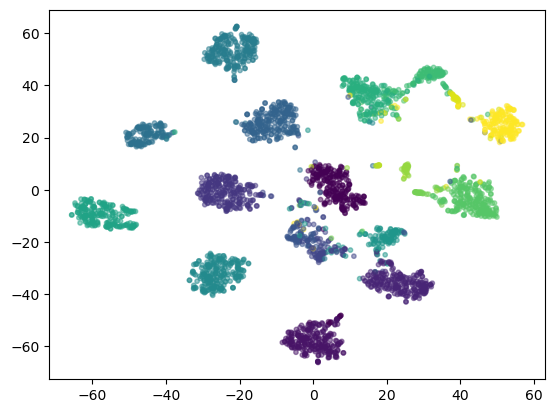

In [9]:
res0=TSNE(n_components=2,init='pca').fit_transform(X.numpy())
plt.scatter(res0[:,0],res0[:,1],c=C.numpy(),s=10,alpha=0.5)

Computing pairwise distances...
Computing P-values for point 0 of 3221...
Computing P-values for point 500 of 3221...
Computing P-values for point 1000 of 3221...
Computing P-values for point 1500 of 3221...
Computing P-values for point 2000 of 3221...
Computing P-values for point 2500 of 3221...
Computing P-values for point 3000 of 3221...
Mean value of sigma: 0.881860
training started @lr=50,epoch=600,weight_decay=0.0,momentum=0.5
running epoch=0
running epoch=100
running epoch=200
running epoch=300
running epoch=400
running epoch=500
train complete!
final loss=26.267221450805664


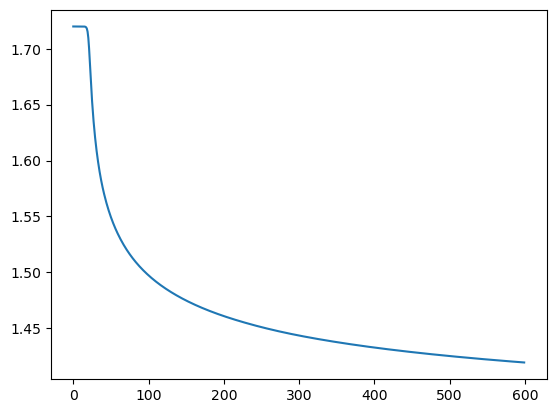

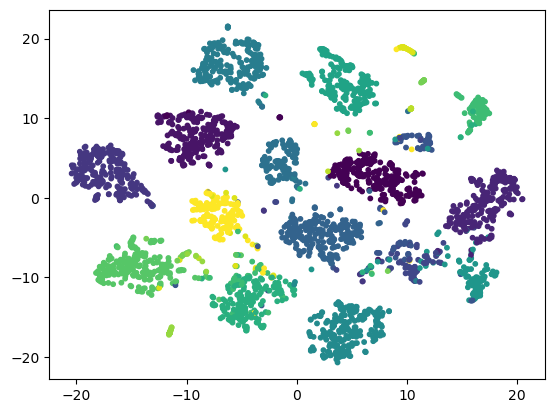

In [10]:
T=tsne.myTSNE(X)
res1=T.train(epoch=600, lr=50, weight_decay=0., momentum=0.5, show=True).numpy()
plt.scatter(res1[:,0],res1[:,1],c=C.numpy(),s=20)

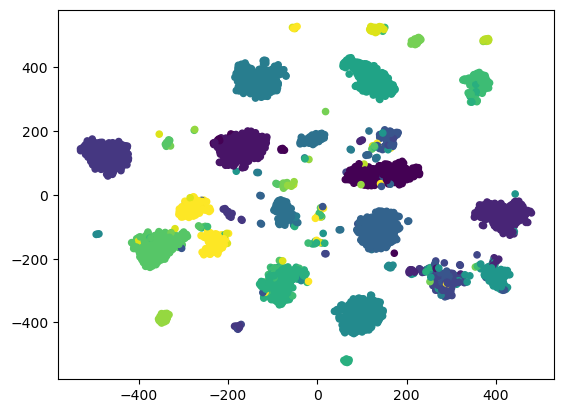

In [12]:
T=tsne.myTSNE(X)
res2=T.train(epoch=400, lr=50, weight_decay=0, momentum=1, show=True).numpy()
plt.scatter(res2[:,0],res2[:,1],c=C.numpy(),s=10)